### Medidas de dispersão são medidas estatísticos utilizadas para identificar o grau de variabilidade de um conjunto de dados.

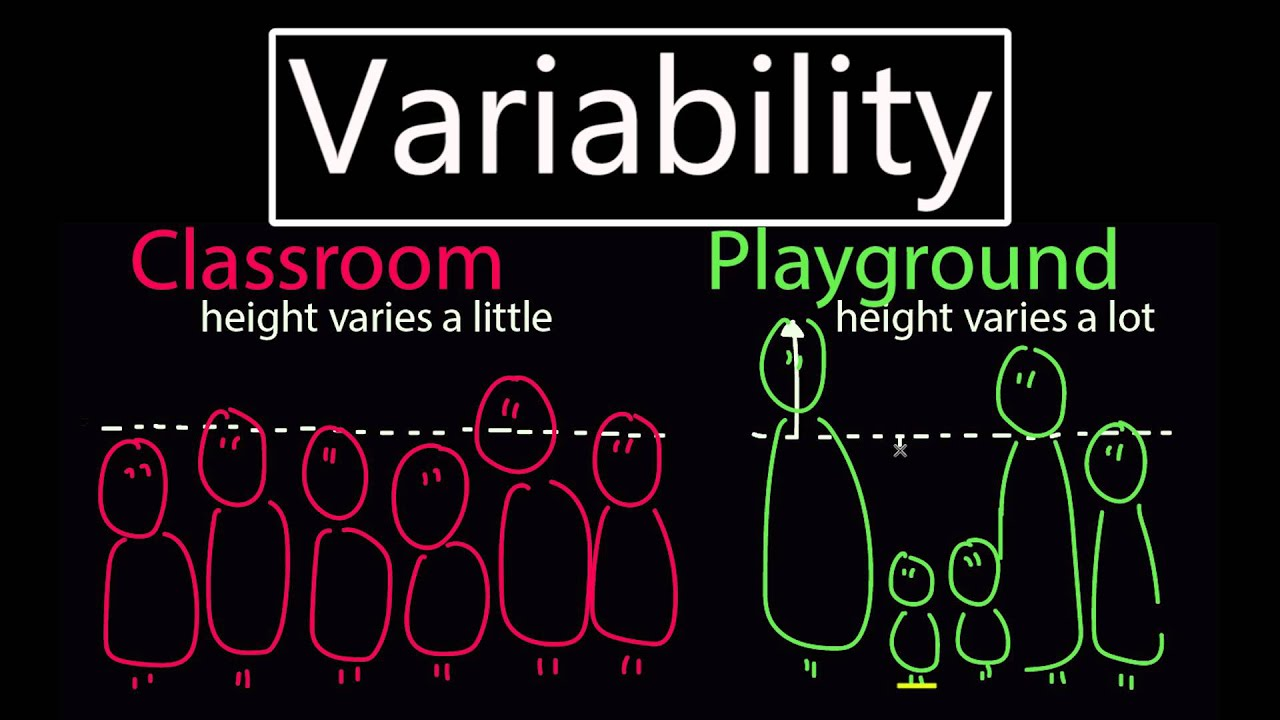

#### As medidas de dispersão mais comuns são a variância, desvio padrão e coeficiente de variação.

#### Vamos continuar usando os dados do preço do Big Mac de julho de 2022.

https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice

#### Importando a biblioteca pandas (https://pandas.pydata.org)

In [1]:
import pandas as pd

#### Lendo os dados, que estão em csv

In [2]:
df = pd.read_csv('BigmacPriceJuly2022.csv')

In [3]:
df.head()

date currency_code        name  local_price  dollar_ex  dollar_price
0  2022-07-01           ARS   Argentina       590.00        129          4.57
1  2022-07-01           AUD   Australia         6.70          1          6.70
2  2022-07-01           EUR     Austria         4.35          1          4.35
3  2022-07-01           AZN  Azerbaijan         4.70          1          4.70
4  2022-07-01           BHD     Bahrain         1.60          1          1.60


#### **Descrição das colunas**

    • date - Data do registro

    • currency_code - Código ISO 4217 internacional do país

    • name - Nome do país

    • local_price - Preço do Big Mac na moeda local

    • dollar_ex - Taxa de Conversão do dólar amerciano para a moeda local

    • dollar_price - Preço do Big Mac em dólares americanos

### Variância

#### A variância é uma medida de dispersão que nos ajuda a entender o quão longe da média os dados estão.

#### Na prática, a variância é a média do quadrado das distâncias entre cada observação e a média.

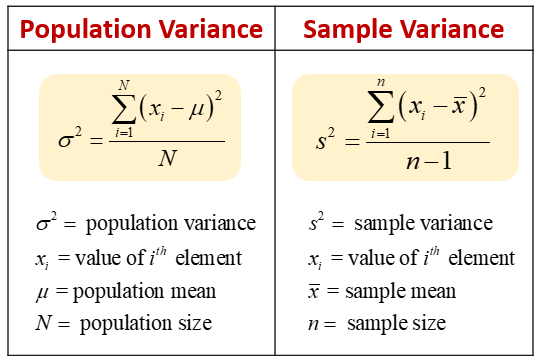

#### Por que precisamos elevar ao quadrado ?

*Queremos medir a distância entre cada observação e a média, mas pode ser que alguma observação seja menor do que a média! Nesse caso, somente fazer a diferença entre a observação e a média daria um valor negativo, e acabaria se anulando com as outras distancias.*

In [4]:
lista_exemplo_variancia = [1, 2, 3, 4, 5]

In [5]:
def media(lista):
    return sum(lista)/len(lista)

In [6]:
media(lista_exemplo_variancia)

3.0

In [7]:
1 - 3 

-2

#### Nesse exemplo todas as distâncias se anulariam e diríamos que os dados não tem variação alguma, o que não é verdade!

In [8]:
(1-3) + (2-3) + (3-3) + (4-3) + (5-3)

0

*Quando elevamos um número ao quadrado, o resultado é sempre e positivo e por isso elevamos as diferenças ao quadrado no caso da variância!*

In [9]:
(1-3)**2 + (2-3)**2 + (3-3)**2 + (4-3)**2 + (5-3)**2

10

#### Vamos tentar implementar a fórmula da variância amostral

In [45]:
def variancia_amostral(lista):
    media_lista = media(lista) # Cálulo da média
    tamanho_lista = len(lista) # Tamanho da lista
    
    lista_distancias_quadradas = [] # Array com as observações
    for observacao in lista: # Interando nas observações
        distancia_quadrada = (observacao - media_lista) ** 2 # Pra cada observação calculá-se (observação-1)**2
        lista_distancias_quadradas.append(distancia_quadrada) # Adicionado o novo valor ao Array
        
    variancia = sum(lista_distancias_quadradas)/(tamanho_lista - 1) # A variância será a soma desses valores / (tamanho-1)
    
    return variancia

In [44]:
variancia_amostral(lista_exemplo_variancia)

2.5

#### Vamos tentar implementar a fórmula da variância populacional

In [48]:
def variancia_populacional(lista):
    media_lista = media(lista) # Cálulo da média
    tamanho_lista = len(lista) # Tamanho da lista
    
    lista_distancias_quadradas = [] # Array com as observações
    for observacao in lista: # Interando nas observações
        distancia_quadrada = (observacao - media_lista) ** 2 # Pra cada observação calculá-se (observação-1)**2
        lista_distancias_quadradas.append(distancia_quadrada) # Adicionado o novo valor ao Array
        
    variancia = sum(lista_distancias_quadradas)/(tamanho_lista) # A variância será a soma desses valores dividido pelo tamamho
    
    return variancia

In [49]:
variancia_populacional(lista_exemplo_variancia)

2.0

#### Podemos usar um pacote pronto para calcular a variância, não é necessário implementar toda vez

In [12]:
import numpy as np

*O numpy calcula-se a variância populacional como padrão*

In [13]:
np.var(lista_exemplo_variancia)

2.0

#### Calcular variância com o pandas

*No pandas a variância padrão calculada é a amostral*

In [14]:
df['dollar_price'].var()

1.8311856107660458

*Essa é a variância do preço do Big Mac no mundo, em dólares*

#### Assim como a média, a variância é facilmente influenciada por valores extremos!

*Lista equilibrada*

In [15]:
lista_alturas_1 = [1.67, 1.72, 1.70, 1.69, 1.74, 1.71]

In [16]:
media(lista_alturas_1)

1.705

In [17]:
np.var(lista_alturas_1)

0.0004916666666666675

*Lista mais espaçada*

In [18]:
lista_alturas_2 = [1.60, 1.66, 1.72, 1.69, 1.78, 1.77]

In [19]:
media(lista_alturas_2)

1.7033333333333331

In [20]:
np.var(lista_alturas_2)

0.0038888888888888883

*Lista com uma altura bem menor do que as outras*

In [21]:
lista_alturas_3 = [1.20, 1.72, 1.70, 1.69, 1.74, 1.71]

In [22]:
media(lista_alturas_3)

1.626666666666667

In [23]:
np.var(lista_alturas_3)

0.03665555555555556

*Lista com uma altura bem maior doque as outras*

In [24]:
lista_alturas_4 = [1.67, 1.72, 1.70, 1.69, 1.74, 2.24]

In [25]:
media(lista_alturas_4)

1.7933333333333332

In [26]:
np.var(lista_alturas_4)

0.040388888888888926

### Desvio Padrão

#### No cálculo da variância, elevamos as diferenças ao quadrado para que as distâncias sejam positivas. Entretanto, ao fazer isso, a variância acaba ficando numa escala diferente dos dados, por que está em uma escala quadrática. Por isso, utilizamos o desvio padrão, que nada mais é do que a raiz quadrada da variância.

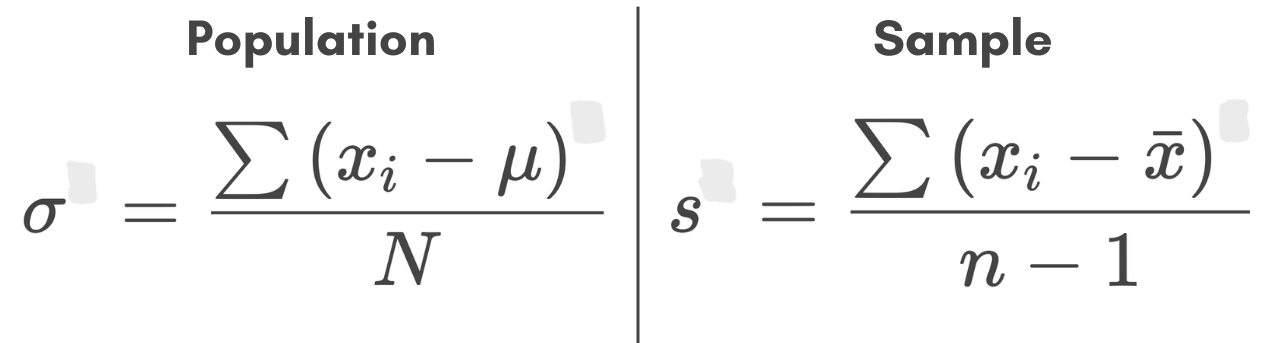

#### Vamos ver um exemplo do cálculo do desvio padrão

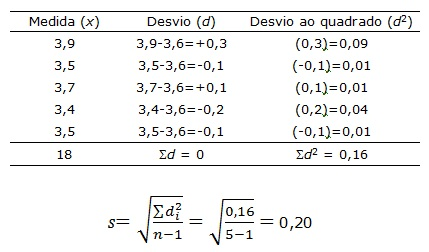

#### É simples calcular a variância com o pandas

In [29]:
df['dollar_price'].std()

1.3532130692415167

*Esse é o desvio padrão do preço do Big Mac no mundo, em dólares*

#### Podemos usar um pacote para calcular o desvio padrão

In [28]:
np.std(lista_exemplo_variancia)

1.4142135623730951

*Como o desvio padrão é a raíz quadrada da variância, ele também vai, assim como a média ser facilmente influenciada por valores extremos*

### Coeficiente de variação

#### Como o desvio padrão, temos uma medida de dispersão na mesma escala dos nossos dados. Entretanto, como saber se os dados são muito variados ou pouco? Como saber se o nosso desvio padrão é pequeno ou grande? Para isso, temos o coeficiente de Variação!

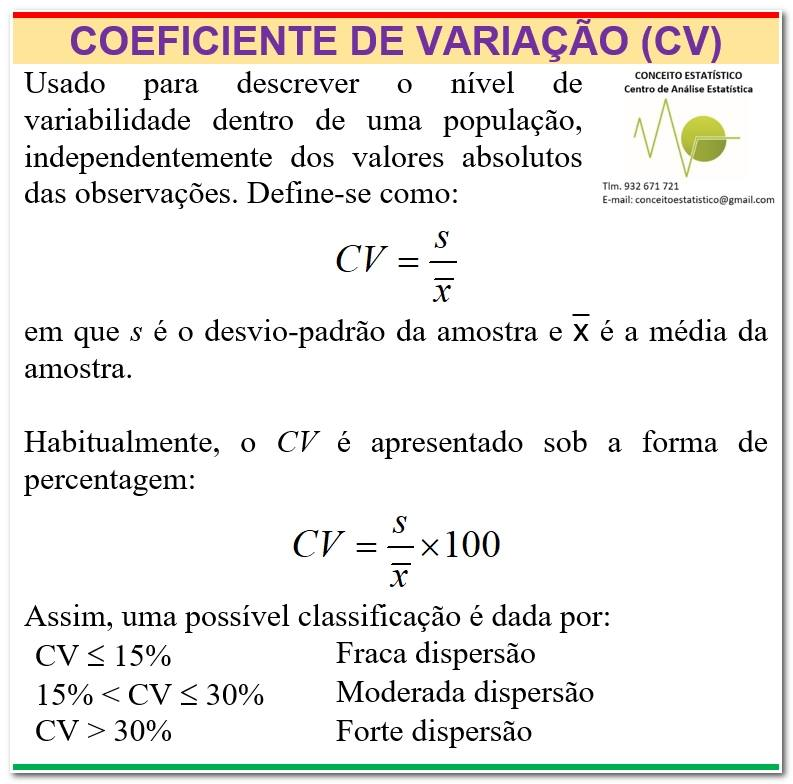

#### O coeficiente de variação é o quociente entre o desvio padrão e a média e, já que multiplicamos por 100, ele vira uma porcentagem. Quanto maior essa porcentagem, podemos dizer que mais distantes da média os dados estão e, consegquentemente, mais variados os dados estão.

#### Vamos calcular o coeficiente de variação do preço do Big Mac em dólares

In [50]:
coeficiente_variacao_big_mac = 100 * df['dollar_price'].std()/df['dollar_price'].mean()
coeficiente_variacao_big_mac

33.800148027441985

#### Os dados são bastantes dispersos!